# Análise dos dados do IDESP (Índice de Desenvolvimento da Educação do Estado de São Paulo)

- Visualização dos dados obtidos após um pré-processamento realizado com SQL.

## Importação de bibliotecas e dos dados

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

diretoria = pd.read_csv("IDESP-Limpeza dados diretoria.csv")

In [2]:
diretoria.head(10)

,ano,diretoria,id_diretoria,nota_idesp_ef_iniciais,nota_idesp_ef_finais,nota_idesp_em
0,2011,AMERICANA,20401,5.19,3.01,1.92
1,2012,AMERICANA,20401,5.17,2.91,2.10
2,2013,AMERICANA,20401,4.94,3.01,2.06
3,2014,AMERICANA,20401,5.50,3.13,2.12
4,2015,AMERICANA,20401,5.58,3.40,2.50
5,2016,AMERICANA,20401,5.81,3.30,2.61
6,2017,AMERICANA,20401,5.77,3.61,2.81
7,2011,APIAI,20301,3.85,2.69,1.99
8,2012,APIAI,20301,3.48,2.81,2.24
9,2013,APIAI,20301,3.43,2.77,2.19


Sabemos que cada diretoria apresenta informação de 7 anos, portanto, vamos analisar qual a média para cada um dos anos escolares de cada diretoria

In [3]:
anterior = diretoria['diretoria'][0]

# Vou guardar as informações das diretorias para montar um dataframe
diretorias = []

media_ef_inicial, media_ef_final, media_em = [], [], []
temp1, temp2, temp3 = [], [], [] # vai guardar os valores para tomar médias
for i in range(len(diretoria['diretoria'])):
  if diretoria['diretoria'][i] == anterior:
    # guardo os valores para tomar as médias
    temp1.append(diretoria['nota_idesp_ef_iniciais'][i])
    temp2.append(diretoria['nota_idesp_ef_finais'][i])
    temp3.append(diretoria['nota_idesp_em'][i])
  else:
    # tomo as médias
    media_ef_inicial.append(np.mean(temp1))
    media_ef_final.append(np.mean(temp2))
    media_em.append(np.mean(temp3))
    diretorias.append(anterior)

    # atualizo o anterior
    anterior = diretoria['diretoria'][i]
    # atualizo as listas que vão realizar os cálculos das médias
    temp1= [diretoria['nota_idesp_ef_iniciais'][i]]
    temp2 =  [diretoria['nota_idesp_ef_finais'][i]]
    temp3 = [diretoria['nota_idesp_em'][i]]

Gerando DataFrames para cada um dos anos:

In [4]:
ef_iniciais_decr = {
    'diretorias': diretorias,
    'media_ef_inicial': media_ef_inicial
}

ef_finais_decr = {
    'diretorias': diretorias,
    'media_ef_final': media_ef_final
}

ef_em_decr = {
    'diretorias': diretorias,
    'media_em': media_em
}

df_ef_inicial = pd.DataFrame(ef_iniciais_decr).sort_values(by=['media_ef_inicial'], ascending = False).reset_index()
df_ef_final = pd.DataFrame(ef_finais_decr).sort_values(by=['media_ef_final'], ascending = False).reset_index()
df_em = pd.DataFrame(ef_em_decr).sort_values(by = ['media_em'], ascending = False).reset_index()
df_ef_inicial.tail()

,index,diretorias,media_ef_inicial
23,23,JACAREI,4.472857
24,26,JOSE BONIFACIO,4.442857
25,6,CAIEIRAS,4.364286
26,9,CARAPICUIBA,4.338571
27,1,APIAI,4.172857


Agrupando as 5 melhores notas de cada ano. 

In [5]:
medias = df_ef_inicial.iloc[0:5, 2]
medias = medias.append(df_ef_final.iloc[0:5, 2])
medias = medias.append(df_em.iloc[0:5, 2])

lugar = df_ef_inicial.iloc[0:5, 1]
lugar = lugar.append(df_ef_final.iloc[0:5, 1])
lugar = lugar.append(df_em.iloc[0:5, 1])

anos = ['ef_iniciais', 'ef_iniciais', 'ef_iniciais', 'ef_iniciais', 'ef_iniciais',
        'ef_finais', 'ef_finais', 'ef_finais', 'ef_finais', 'ef_finais',
        'em', 'em', 'em', 'em', 'em']

dados_melhores = {
    'diretorias': lugar,
    'medias': medias,
    'anos': anos
}
melhores5 = pd.DataFrame(dados_melhores)

Gerando um gráfico para visuzalizar as melhores médias ao longo dos anos de 2011 e 2017

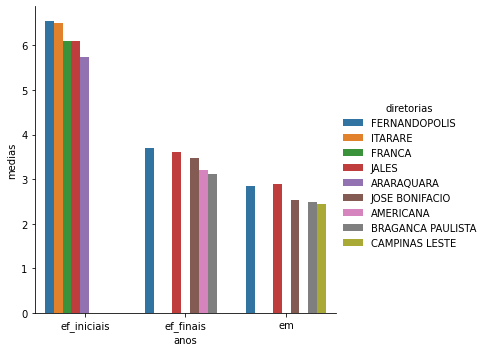

In [6]:
graf1 = sns.catplot(x='anos', y='medias', hue='diretorias', data=melhores5,
                    kind = 'bar')

Repetindo o mesmo para as piores 5 médias.

In [20]:
medias = df_ef_inicial.iloc[-5:, 2]
medias = medias.append(df_ef_final.iloc[-5:, 2])
medias = medias.append(df_em.iloc[-5:, 2])

lugar = df_ef_inicial.iloc[-5:, 1]
lugar = lugar.append(df_ef_final.iloc[-5:, 1])
lugar = lugar.append(df_em.iloc[-5:, 1])

anos = ['ef_iniciais', 'ef_iniciais', 'ef_iniciais', 'ef_iniciais', 'ef_iniciais',
        'ef_finais', 'ef_finais', 'ef_finais', 'ef_finais', 'ef_finais',
        'em', 'em', 'em', 'em', 'em']

dados_piores = {
    'diretorias': lugar,
    'medias': medias,
    'anos': anos
}
piores5 = pd.DataFrame(dados_piores)

Gráfico das 5 piores médias ao longo dos anos de 2011 e 2017

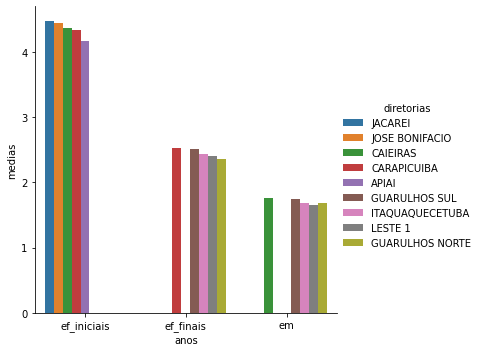

In [8]:
graf1 = sns.catplot(x='anos', y='medias', hue='diretorias', data=piores5,
                    kind = 'bar')

Podemos ver que as diretorias que têm recorrência nas melhores médias para os diferentes anos escolares são:

- **Fernandópolis, Jales, José Bonifácio e Bragança Paulista**

Já no caso das que têm recorrência nas piores médias são:

- **Caieiras, Carapicuiba, Itaquaquecetuba, Guarulhos Sul, Guarulhos Norte e Leste 1**
(Sendo as 4 últimas presentes tanto nos anos finais do ensino fundamental quanto no ensino médio).

Vamos agora analisar a evolução das notas de cada uma dessas diretorias ao longo do período para cada um dos anos escolares. Primeiro, preparo novos dataframes para essas análises:

In [27]:
melhores_no_periodo = diretoria[diretoria['diretoria'] == 'FERNANDOPOLIS']
melhores_no_periodo = melhores_no_periodo.append(diretoria[diretoria['diretoria'] == 'JALES'])
melhores_no_periodo = melhores_no_periodo.append(diretoria[diretoria['diretoria'] == 'JOSE BONIFACIO'])
melhores_no_periodo = melhores_no_periodo.append(diretoria[diretoria['diretoria'] == 'BRAGANCA PAULISTA'])

piores_no_periodo = diretoria[diretoria['diretoria'] == 'CAIEIRAS']
piores_no_periodo = piores_no_periodo.append(diretoria[diretoria['diretoria'] == 'CARAPICUIBA'])
piores_no_periodo = piores_no_periodo.append(diretoria[diretoria['diretoria'] == 'ITAQUAQUECETUBA'])
piores_no_periodo = piores_no_periodo.append(diretoria[diretoria['diretoria'] == 'GUARULHOS SUL'])
piores_no_periodo = piores_no_periodo.append(diretoria[diretoria['diretoria'] == 'GUARULHOS NORTE'])
piores_no_periodo = piores_no_periodo.append(diretoria[diretoria['diretoria'] == 'LESTE 1'])
melhores_no_periodo.head()

,ano,diretoria,id_diretoria,nota_idesp_ef_iniciais,nota_idesp_ef_finais,nota_idesp_em
98,2011,FERNANDOPOLIS,20702,5.91,3.68,2.68
99,2012,FERNANDOPOLIS,20702,6.47,3.45,2.80
100,2013,FERNANDOPOLIS,20702,7.34,3.60,2.58
101,2014,FERNANDOPOLIS,20702,7.39,3.56,2.75
102,2015,FERNANDOPOLIS,20702,6.16,3.94,2.96


### Comparação das notas ao longo dos anos entre as melhores e piores médias para cada ano escolar

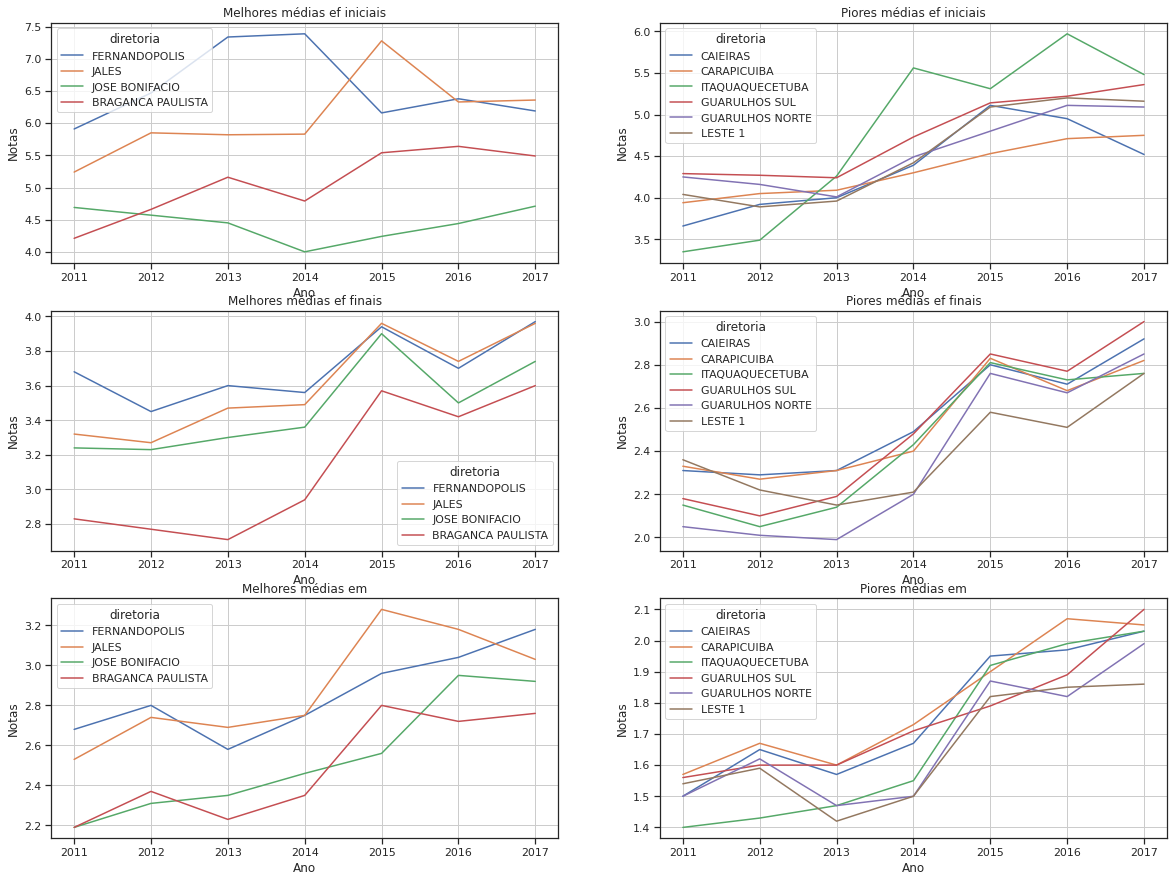

In [59]:
plt.subplots(figsize=(20, 15))
sns.set(style='ticks')

plt.subplot(321, title='Melhores médias ef iniciais', xlabel = 'Ano', ylabel = 'Notas')
sns.lineplot(data=melhores_no_periodo,
             x='ano', y='nota_idesp_ef_iniciais', hue='diretoria')
plt.grid()

plt.subplot(322, title='Piores médias ef iniciais', xlabel = 'Ano', ylabel = 'Notas')
sns.lineplot(data=piores_no_periodo,
             x='ano', y='nota_idesp_ef_iniciais', hue='diretoria')
plt.grid()

plt.subplot(323, title='Melhores médias ef finais', xlabel = 'Ano', ylabel = 'Notas')
sns.lineplot(data=melhores_no_periodo,
             x='ano', y='nota_idesp_ef_finais', hue='diretoria')
plt.grid()

plt.subplot(324, title='Piores médias ef finais', xlabel = 'Ano', ylabel = 'Notas')
#plt.subplots(figsize)
sns.lineplot(data=piores_no_periodo,
             x='ano', y='nota_idesp_ef_finais', hue='diretoria')
plt.grid()
plt.subplot(325, title='Melhores médias em', xlabel = 'Ano', ylabel = 'Notas')
sns.lineplot(data=melhores_no_periodo,
             x='ano', y='nota_idesp_em', hue='diretoria')
plt.grid()

plt.subplot(326, title='Piores médias em', xlabel = 'Ano', ylabel = 'Notas')
#plt.subplots(figsize)
sns.lineplot(data=piores_no_periodo,
             x='ano', y='nota_idesp_em', hue='diretoria')
plt.grid()

plt.show()